<a href="https://colab.research.google.com/github/sovank/DevOpsPortfolio/blob/main/Day_117_Kubernetes_Configuration_and_Advance_Pod_Concepts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q14. Creating a Pod in Kubernetes

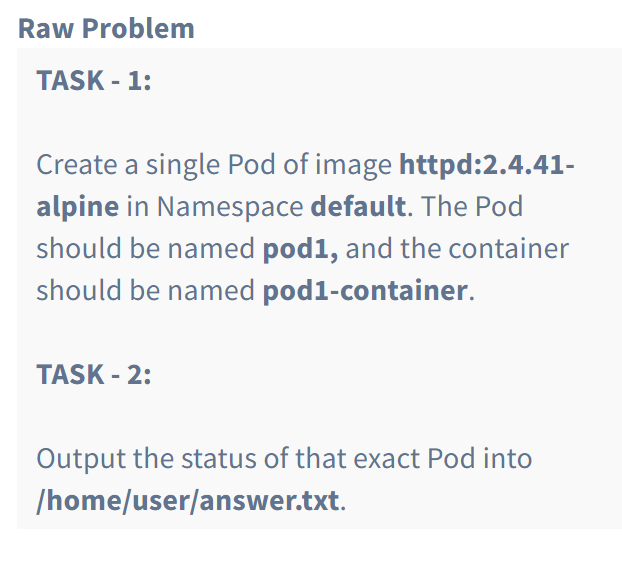

In [ ]:
kind: Pod
apiVersion: v1
metadata:
  name: pod1
spec:
  containers:
    - name: pod1-container  # be very careful with the - as there can be multiple containers in a pod
      image: httpd:2.4.41-alpine

In [ ]:
alias k=kubectl

k get pod pod1 -n default -o wide > /home/user/answer.txt

\

---



# Q15. Change Namespace

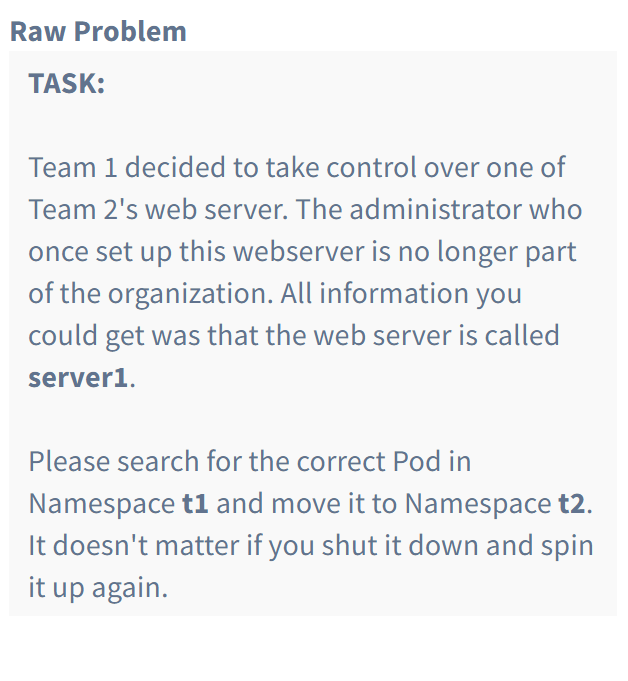

In [ ]:
alias k=kubectl

k get ns
# NAME              STATUS   AGE
# kube-system       Active   2m53s
# kube-public       Active   2m53s
# kube-node-lease   Active   2m53s
# default           Active   2m53s
# t1                Active   2m52s
# t2                Active   2m52s

k get pods -n t1
# NAME                      READY   STATUS    RESTARTS   AGE
# server1-856b5b9f5-vt4v7   1/1     Running   0          3m13s


k describe pod server1-856b5b9f5-vt4v7 -n t1

# Export the Pod's YAML Definition
k get deployment -n t1 -o yaml > server-file.yml

apiVersion: v1
items:
- apiVersion: apps/v1
  kind: Deployment
  metadata:
    annotations:
      deployment.kubernetes.io/revision: "1"
      kubectl.kubernetes.io/last-applied-configuration: |
        {"apiVersion":"apps/v1","kind":"Deployment","metadata":{"annotations":{},"name":"server1","namespace":"t1"},"spec":{"replicas":1,"selector":{"matchLabels":{"app":"server1"}},"template":{"metadata":{"labels":{"app":"server1"}},"spec":{"containers":[{"image":"nginx","name":"server1","ports":[{"containerPort":80}]}]}}}}
    creationTimestamp: "2024-12-10T17:21:29Z"
    generation: 1
    name: server1
    namespace: t1
    resourceVersion: "569"
    uid: e14b0e30-78d5-4d91-9621-7d6a12ece288
  spec:
    progressDeadlineSeconds: 600
    replicas: 1
    revisionHistoryLimit: 10
    selector:
      matchLabels:
        app: server1
    strategy:
      rollingUpdate:
        maxSurge: 25%
        maxUnavailable: 25%
      type: RollingUpdate
    template:
      metadata:
        creationTimestamp: null
        labels:
          app: server1
      spec:
        containers:
        - image: nginx
          imagePullPolicy: Always
          name: server1
          ports:
          - containerPort: 80
            protocol: TCP
          resources: {}
          terminationMessagePath: /dev/termination-log
          terminationMessagePolicy: File
        dnsPolicy: ClusterFirst
        restartPolicy: Always
        schedulerName: default-scheduler
        securityContext: {}
        terminationGracePeriodSeconds: 30
  status:
    availableReplicas: 1
    conditions:
    - lastTransitionTime: "2024-12-10T17:22:06Z"
      lastUpdateTime: "2024-12-10T17:22:06Z"
      message: Deployment has minimum availability.
      reason: MinimumReplicasAvailable
      status: "True"
      type: Available
    - lastTransitionTime: "2024-12-10T17:21:45Z"
      lastUpdateTime: "2024-12-10T17:22:06Z"
      message: ReplicaSet "server1-856b5b9f5" has successfully progressed.
      reason: NewReplicaSetAvailable
      status: "True"
      type: Progressing
    observedGeneration: 1
    readyReplicas: 1
    replicas: 1
    updatedReplicas: 1
kind: List
metadata:
  resourceVersion: ""


#DELETE deployment 1 -> Server1
k delete deployment server1 -n t1

#MOVING pod t1 -> t2
k apply -f server-dep.yaml
